In [304]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib as mpl

import math
import networkx as nx

## Genitive versus Accusative for all languages

In [2]:
ru_gen = np.load('./averages/ru_gen.npy')
ru_acc = np.load('./averages/ru_acc.npy')

de_gen = np.load('./averages/de_gen.npy')
de_acc = np.load('./averages/de_acc.npy')

pl_gen = np.load('./averages/pl_gen.npy')
pl_acc = np.load('./averages/pl_acc.npy')

cz_gen = np.load('./averages/cz_gen.npy')
cz_acc = np.load('./averages/cz_acc.npy')

fi_gen = np.load('./averages/fi_gen.npy')
fi_acc_n = np.load('./averages/fi_acc_n.npy')
fi_acc_g = np.load('./averages/fi_acc_g.npy')

In [424]:
ru_gen.shape, de_gen.shape, pl_gen.shape, cz_gen.shape, fi_gen.shape

((1799, 768), (2369, 768), (816, 768), (1574, 768), (2050, 768))

In [3]:
ru_diff = ru_gen - ru_acc
de_diff = de_gen - de_acc
pl_diff = pl_gen - pl_acc
cz_diff = cz_gen - cz_acc
fi_diff_n = fi_gen - fi_acc_n
fi_diff_g = fi_gen - fi_acc_g

In [4]:
# if we compare averages
ru_diff_avg = np.mean(ru_diff, axis = 0)
pl_diff_avg = np.mean(pl_diff, axis = 0)
de_diff_avg = np.mean(de_diff, axis = 0)
cz_diff_avg = np.mean(cz_diff, axis = 0)
fi_diff_n_avg = np.mean(fi_diff_n, axis = 0)
fi_diff_g_avg = np.mean(fi_diff_g, axis = 0)

0.0633662209448903

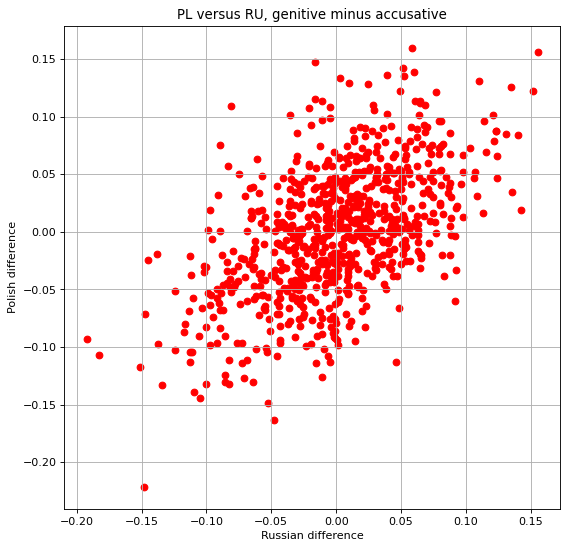

In [5]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.title("PL versus RU, genitive minus accusative")
plt.xlabel("Russian difference")
plt.ylabel("Polish difference")

plt.scatter(ru_diff_avg, pl_diff_avg, c = "red")
r2_score(ru_diff_avg, pl_diff_avg)

0.14044399628027748

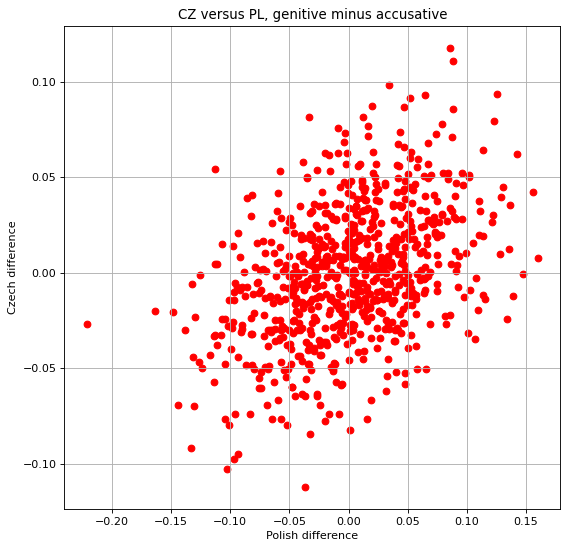

In [6]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.title("CZ versus PL, genitive minus accusative")
plt.xlabel("Polish difference")
plt.ylabel("Czech difference")

plt.scatter(pl_diff_avg, cz_diff_avg, c = "red")
r2_score(pl_diff_avg, cz_diff_avg)

-1.3499209771986531

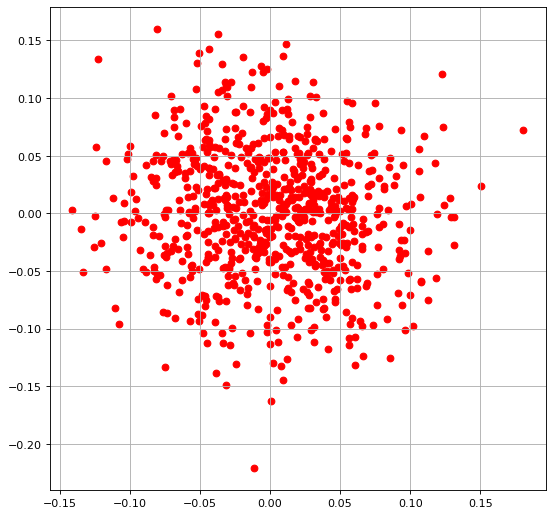

In [9]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.scatter(fi_diff_n_avg, pl_diff_avg, c = "red")
r2_score(fi_diff_n_avg, pl_diff_avg)

## Dative versus genitive

In [15]:
#ru_gen = np.load('./averages/ru_gen.npy')
ru_dat = np.load('./averages/ru_dat.npy')

#de_gen = np.load('./averages/de_gen.npy')
de_dat = np.load('./averages/de_dat.npy')

#pl_gen = np.load('./averages/pl_gen.npy')
pl_dat = np.load('./averages/pl_dat.npy')

#cz_gen = np.load('./averages/cz_gen.npy')
cz_dat = np.load('./averages/cz_dat.npy')

#fi_gen = np.load('./averages/fi_gen.npy')
#fi_acc_n = np.load('./averages/fi_acc_n.npy')


In [16]:
ru_diff_avg_gen_dat = np.average(ru_gen - ru_dat, axis = 0)
pl_diff_avg_gen_dat = np.average(pl_gen - pl_dat, axis = 0)
cz_diff_avg_gen_dat = np.average(cz_gen - cz_dat, axis = 0)
de_diff_avg_gen_dat = np.average(de_gen - de_dat, axis = 0)

0.21991294073882917

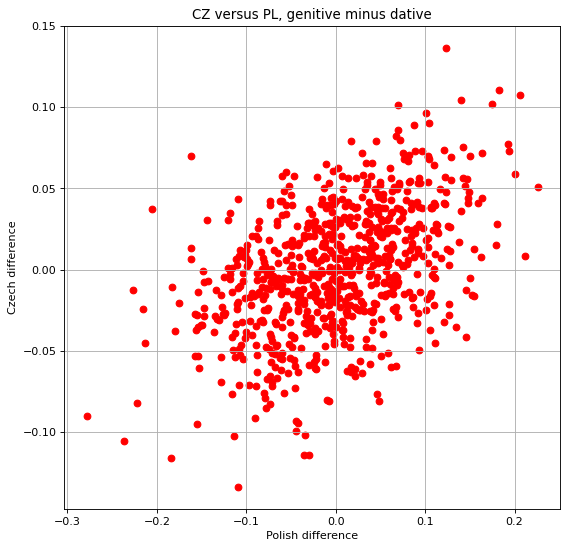

In [17]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.title("CZ versus PL, genitive minus dative")
plt.xlabel("Polish difference")
plt.ylabel("Czech difference")

plt.scatter(pl_diff_avg_gen_dat, cz_diff_avg_gen_dat, c = "red")
r2_score(pl_diff_avg_gen_dat, cz_diff_avg_gen_dat)

0.39374880286513114

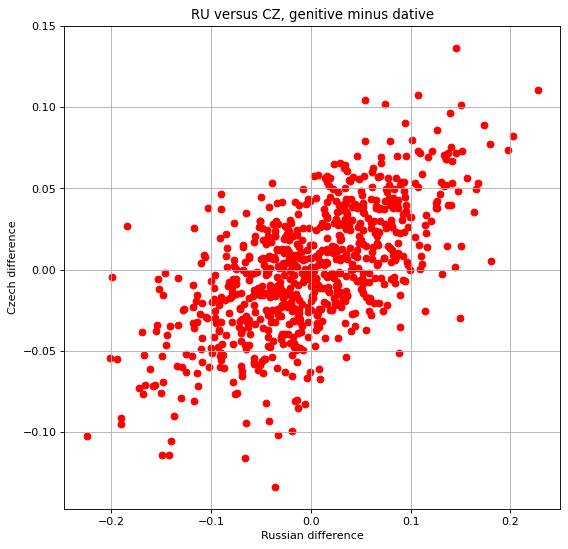

In [18]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.title("RU versus CZ, genitive minus dative")
plt.xlabel("Russian difference")
plt.ylabel("Czech difference")

plt.scatter(ru_diff_avg_gen_dat, cz_diff_avg_gen_dat, c = "red")
r2_score(ru_diff_avg_gen_dat, cz_diff_avg_gen_dat)

-0.14261627297918533

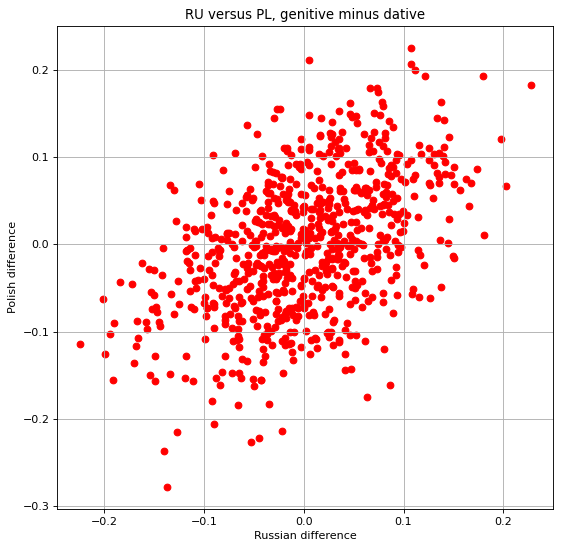

In [19]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.title("RU versus PL, genitive minus dative")
plt.xlabel("Russian difference")
plt.ylabel("Polish difference")

plt.scatter(ru_diff_avg_gen_dat, pl_diff_avg_gen_dat, c = "red")
r2_score(ru_diff_avg_gen_dat, pl_diff_avg_gen_dat)

1.0

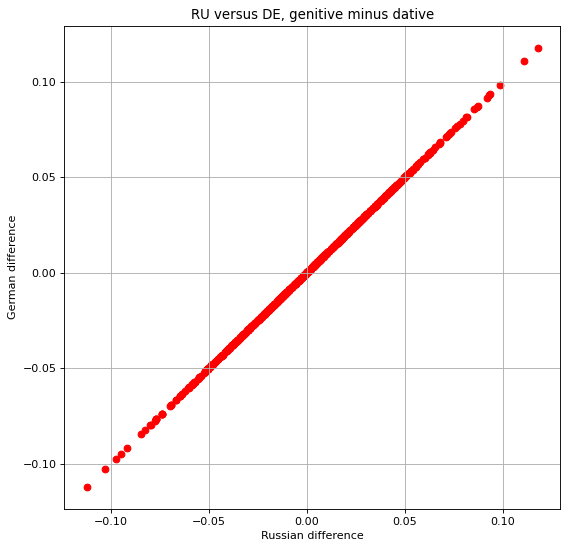

In [20]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.title("RU versus DE, genitive minus dative")
plt.xlabel("Russian difference")
plt.ylabel("German difference")

plt.scatter(cz_diff_avg, cz_diff_avg, c = "red")
r2_score(cz_diff_avg, cz_diff_avg)

## Accusative versus dative

In [21]:
# jacob's idea: find mean of all words first that fall under one case
ru_acc_avg = np.mean(ru_acc, axis = 0)
cz_acc_avg = np.mean(cz_acc, axis = 0)
de_acc_avg = np.mean(de_acc, axis = 0)

de_gen_avg = np.mean(de_gen, axis = 0)
ru_gen_avg = np.mean(ru_gen, axis = 0)

fi_gen_avg = np.mean(fi_gen, axis = 0)

print(ru_acc_avg.shape, cz_acc_avg.shape)

(768,) (768,)


0.8455087653114541 2.900059


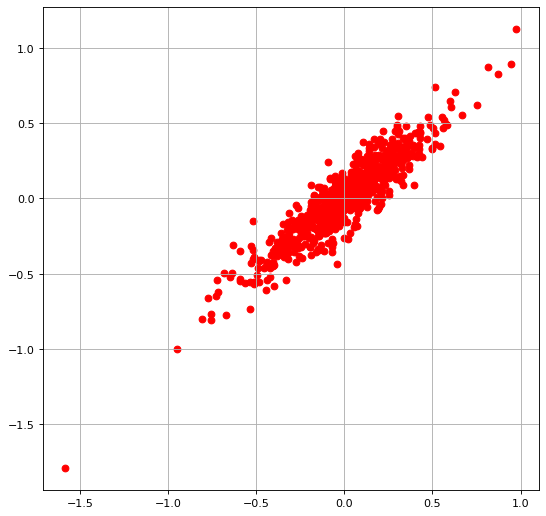

In [22]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.scatter(ru_acc_avg, cz_acc_avg, c = "red")
print(r2_score(ru_acc_avg, cz_acc_avg), np.linalg.norm(cz_acc_avg - ru_acc_avg))

0.4725023326099541


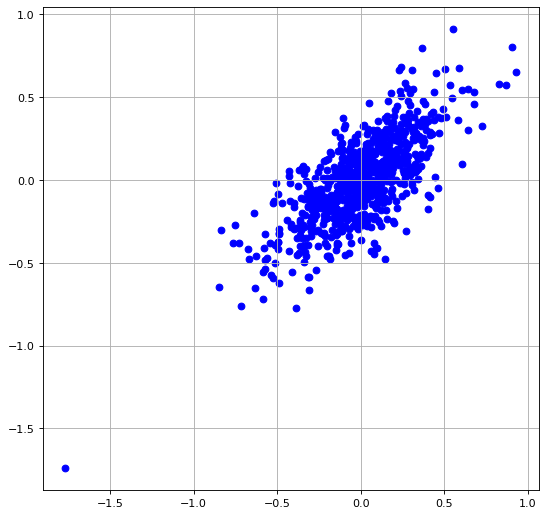

In [23]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.scatter(ru_gen_avg, de_acc_avg, c = "blue")
print(r2_score(ru_gen_avg, de_acc_avg))

In [24]:
b = (1 / (ru_acc_avg.T @ ru_acc_avg)) * (ru_acc_avg.T @ cz_acc_avg)
b

0.9226629036916741

0.8255503997456047 2.8433673


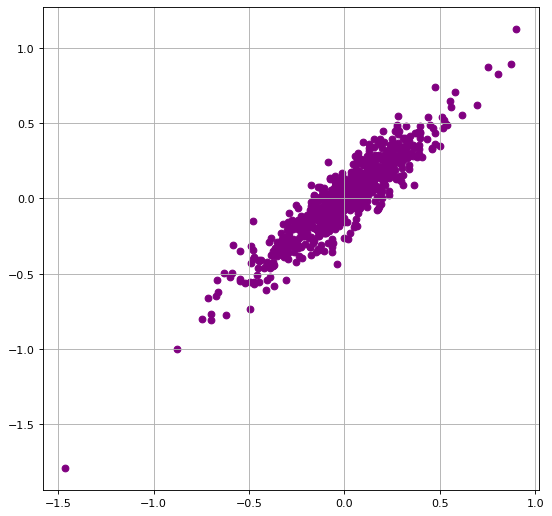

In [25]:
plt.figure(figsize=(8, 8), dpi=80)
plt.grid()

plt.scatter((ru_acc_avg * b), cz_acc_avg, c = "purple")
print(r2_score((ru_acc_avg * b), cz_acc_avg), np.linalg.norm(cz_acc_avg - (ru_acc_avg * b)))

# The way done in the paper

In [26]:
ru_gen = np.load('./averages/ru_gen.npy')
ru_acc = np.load('./averages/ru_acc.npy')
ru_dat = np.load('./averages/ru_dat.npy')

de_gen = np.load('./averages/de_gen.npy')
de_acc = np.load('./averages/de_acc.npy')
de_dat = np.load('./averages/de_dat.npy')

pl_gen = np.load('./averages/pl_gen.npy')
pl_acc = np.load('./averages/pl_acc.npy')
pl_dat = np.load('./averages/pl_dat.npy')
pl_loc = np.load('./averages/pl_loc.npy')

cs_gen = np.load('./averages/cz_gen.npy')
cs_acc = np.load('./averages/cz_acc.npy')
cs_dat = np.load('./averages/cz_dat.npy')
cs_loc = np.load('./averages/cz_loc.npy')

fi_gen = np.load('./averages/fi_gen.npy')
fi_acc = np.load('./averages/fi_acc_n.npy')

In [27]:
ru_gen_avg = np.mean(ru_gen, axis = 0)
ru_acc_avg = np.mean(ru_acc, axis = 0)
ru_dat_avg = np.mean(ru_dat, axis = 0)

de_gen_avg = np.mean(de_gen, axis = 0)
de_acc_avg = np.mean(de_acc, axis = 0)
de_dat_avg = np.mean(de_dat, axis = 0)

pl_gen_avg = np.mean(pl_gen, axis = 0)
pl_acc_avg = np.mean(pl_acc, axis = 0)
pl_dat_avg = np.mean(pl_dat, axis = 0)
pl_loc_avg = np.mean(pl_loc, axis = 0)

cs_gen_avg = np.mean(cs_gen, axis = 0)
cs_acc_avg = np.mean(cs_acc, axis = 0)
cs_dat_avg = np.mean(cs_dat, axis = 0)
cs_loc_avg = np.mean(cs_loc, axis = 0)

fi_gen_avg = np.mean(fi_gen, axis = 0)
fi_acc_avg = np.mean(fi_acc, axis = 0)

In [559]:
def solve_tmat(Y, X): # translation from X to Y
    
    Y_hat = (np.linalg.pinv(X @ X.T) @ (X @ Y.T)).T @ X
    
    X_hat = (np.linalg.pinv(Y @ Y.T) @ (Y @ X.T)).T @ Y
    
    return round(math.sqrt(np.linalg.norm(Y - Y_hat)**2 / (2*768)) + \
          math.sqrt(np.linalg.norm(X - X_hat)**2 / (2*768)), 2)

In [587]:
def solve_tmat2_1D(Y,X):
    
    Y_hat = X @ (np.linalg.pinv(X.T @ X) @ (X.T @ Y))
    
    return round(np.linalg.norm(Y - Y_hat)**2, 2)

def solve_tmat2(Y,X):
    
    Y_hat = X @ (np.linalg.pinv(X.T @ X) @ (X.T @ Y))
    X_hat = Y @ (np.linalg.pinv(Y.T @ Y) @ (Y.T @ X))
    
    return round(0.5 * ((np.linalg.norm(Y - Y_hat)**2) + (np.linalg.norm(X - X_hat)**2)), 2)

In [561]:
def solve_tmat_1D(Y, X): # translation from X to Y
    
    Y_hat = (np.linalg.pinv(X @ X.T) @ (X @ Y.T)).T @ X
    
    #X_hat = (np.linalg.pinv(Y @ Y.T) @ (Y @ X.T)).T @ Y
    
    return round(math.sqrt(np.linalg.norm(Y - Y_hat)**2 / 768), 2)

In [562]:
A = np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg])))

solve_tmat_1D(A, A)

0.0

In [563]:
Y = np.array([[1, 4], [2, 0]])
X = np.array([[2, 1], [1, -1]])

solve_tmat(Y, X)

0.0

In [564]:
Y = np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]), np.array([ru_dat_avg]))).T
X = np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]), np.array([de_dat_avg]))).T

print(Y.shape, X.shape)

print(solve_tmat(Y, X)) # russian vs german

Y = np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T
X = np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T

print(solve_tmat2(Y, X)) # russian vs german (just genitive and accusitive)

(768, 3) (768, 3)
232.86
48.0


In [192]:
Y = np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]), np.array([ru_dat_avg]))).T
X = np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]), np.array([pl_dat_avg]))).T

solve_tmat(Y, X) # russian versus polish

Y = np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T
X = np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T

solve_tmat(Y, X) # russian versus polish (just genitive and accusitive)

166.92

In [193]:
Y = np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]), np.array([ru_dat_avg]))).T
X = np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]), np.array([cs_dat_avg]))).T

solve_tmat(Y, X) # russian vs czech

Y = np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T
X = np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T

solve_tmat(Y, X) # russian vs czech (just genitive and accusitive)

186.29

In [194]:
Y = np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T
X = np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T

solve_tmat(Y, X) # russian vs finnish

152.03

In [195]:
Y = np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]), np.array([de_dat_avg]))).T
X = np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]), np.array([pl_dat_avg]))).T

solve_tmat(Y, X) # deutsch versus polish

Y = np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T
X = np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T

solve_tmat(Y, X) # deutsch versus polish (just genitive and accusitive)

136.06

In [196]:
Y = np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]), np.array([de_dat_avg]))).T
X = np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]), np.array([cs_dat_avg]))).T

solve_tmat(Y, X) # deutsch versus czech

Y = np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T
X = np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T

solve_tmat(Y, X) # deutsch versus czech (just genitive and accusitive)

158.56

In [197]:
Y = np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T
X = np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T

solve_tmat(Y, X) # deutsch versus finnish


119.03

In [198]:
Y = np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]), np.array([pl_dat_avg]), np.array([pl_loc_avg]))).T
X = np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]), np.array([cs_dat_avg]), np.array([cs_loc_avg]))).T

solve_tmat(Y, X) # polish vs czech

Y = np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T
X = np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T

solve_tmat(Y, X) # polish vs czech (just genitive and accusitive)

168.64

In [199]:
Y = np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T
X = np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T

solve_tmat(Y, X) # polish versus finnish


138.81

In [200]:
Y = np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T
X = np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T

solve_tmat(Y, X) # czech versus finnish


174.26

In [596]:
G = nx.Graph()
G.add_edge("DE", "RU", weight = solve_tmat2(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))
G.add_edge("DE", "CS", weight = solve_tmat2(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))
G.add_edge("DE", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))
G.add_edge("DE", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("RU", "CS", weight = solve_tmat2(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))
G.add_edge("RU", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))
G.add_edge("RU", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))

G.add_edge("CS", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))
G.add_edge("CS", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))

G.add_edge("PL", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))

In [597]:
w = nx.get_edge_attributes(G, 'weight')

{('DE', 'RU'): Text(-0.6545085608959198, -0.4755282839152457, '47.73'),
 ('DE', 'CS'): Text(-0.09549137949943542, -0.2938925166937949, '46.71'),
 ('DE', 'PL'): Text(-0.09549149870872498, 0.29389257828263027, '49.2'),
 ('DE', 'FI'): Text(-0.6545087099075317, 0.47552813688782436, '53.46'),
 ('RU', 'CS'): Text(0.2500000596046448, -0.769420713186264, '17.06'),
 ('RU', 'PL'): Text(0.24999994039535522, -0.18163561820983887, '25.25'),
 ('RU', 'FI'): Text(-0.30901727080345154, -5.960464477539063e-08, '29.69'),
 ('CS', 'PL'): Text(0.8090171217918396, 1.4901161193847656e-07, '14.47'),
 ('CS', 'FI'): Text(0.24999991059303284, 0.18163570761680603, '21.96'),
 ('PL', 'FI'): Text(0.2499997913837433, 0.7694208025932312, '32.07')}

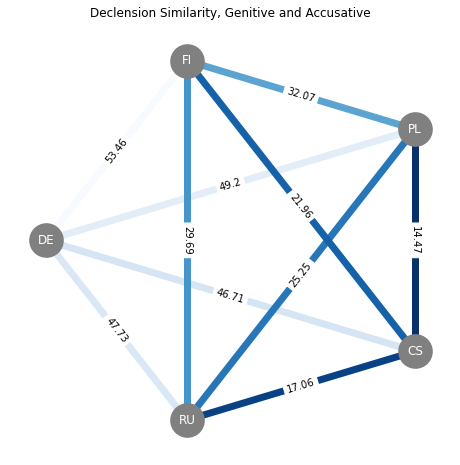

In [599]:
plt.figure(figsize = (8, 8))
plt.title("Declension Similarity, Genitive and Accusative", size = 12)
pos = nx.shell_layout(G)
nx.draw(G, pos, node_size = 1000, node_color = 'gray', font_color = 'white', linewidths = 3,
              edge_color = [-w[k] for k in w], width = 7, edge_cmap = plt.cm.Blues,
              labels={node: node for node in G.nodes()})

#pos = nx.draw(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels = nx.get_edge_attributes(G, 'weight'), font_color='black', )
#nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G)['weight'])

In [606]:
# the blue graph, but weighted

G = nx.DiGraph()
G.add_edge("RU", "DE", weight = solve_tmat2_1D(np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T, \
                                           np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))                                          
G.add_edge("DE", "RU", weight = solve_tmat2_1D(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("CS", "DE", weight = solve_tmat2_1D(np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))
G.add_edge("DE", "CS", weight = solve_tmat2_1D(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("PL", "DE", weight = solve_tmat2_1D(np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))
G.add_edge("DE", "PL", weight = solve_tmat2_1D(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("FI", "DE", weight = solve_tmat2_1D(np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T))
G.add_edge("DE", "FI", weight = solve_tmat2_1D(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("RU", "CS", weight = solve_tmat2_1D(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))
G.add_edge("CS", "RU", weight = solve_tmat2_1D(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))

G.add_edge("PL", "RU", weight = solve_tmat2_1D(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))
G.add_edge("RU", "PL", weight = solve_tmat2_1D(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))

G.add_edge("FI", "RU", weight = solve_tmat2_1D(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T))
G.add_edge("RU", "FI", weight = solve_tmat2_1D(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))

G.add_edge("CS", "PL", weight = solve_tmat2_1D(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))
G.add_edge("PL", "CS", weight = solve_tmat2_1D(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))

G.add_edge("CS", "FI", weight = solve_tmat2_1D(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))
G.add_edge("FI", "CS", weight = solve_tmat2_1D(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T))


G.add_edge("PL", "FI", weight = solve_tmat2_1D(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))
G.add_edge("FI", "PL", weight = solve_tmat2_1D(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T))


In [607]:
w = nx.get_edge_attributes(G, 'weight')
w

{('RU', 'DE'): 47.78,
 ('RU', 'CS'): 16.75,
 ('RU', 'PL'): 26.94,
 ('RU', 'FI'): 30.81,
 ('DE', 'RU'): 47.68,
 ('DE', 'CS'): 46.18,
 ('DE', 'PL'): 49.98,
 ('DE', 'FI'): 54.11,
 ('CS', 'DE'): 47.24,
 ('CS', 'RU'): 17.37,
 ('CS', 'PL'): 16.52,
 ('CS', 'FI'): 23.15,
 ('PL', 'DE'): 48.42,
 ('PL', 'RU'): 23.55,
 ('PL', 'CS'): 12.42,
 ('PL', 'FI'): 31.29,
 ('FI', 'DE'): 52.8,
 ('FI', 'RU'): 28.57,
 ('FI', 'CS'): 20.78,
 ('FI', 'PL'): 32.85}

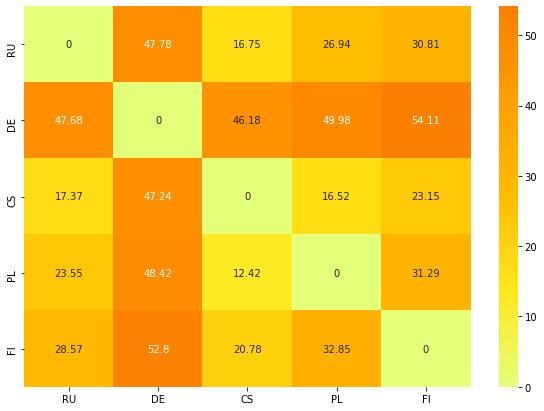

In [608]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = nx.adjacency_matrix(G).todense()

df_cm = pd.DataFrame(array, index = list(G.nodes()),
              columns = list(G.nodes()))

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="Wistia", fmt='g')

In [579]:
plt.figure(figsize = (8, 8))
plt.title("Declension Similarity, Genitive and Accusative", size = 12)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 1000, node_color = 'gray', font_color = 'white'), linewidths = 3,
#              edge_color = [-w[k] for k in w], width = 2, edge_cmap = plt.cm.Blues,
              label={node: node for node in G.nodes()})

#pos = nx.draw(G)
#nx.draw_networkx_edge_labels(G, pos, edge_labels = nx.get_edge_attributes(G, 'weight'), font_color='black', )
#nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G)['weight'])

IndentationError: unexpected indent (<ipython-input-579-386c8fb8f220>, line 6)

In [565]:
# attempt to do this with the other LS formula

# the blue graph, but weighted

G = nx.DiGraph()
G.add_edge("RU", "DE", weight = solve_tmat2(np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T, \
                                           np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))                                          
G.add_edge("DE", "RU", weight = solve_tmat2(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("CS", "DE", weight = solve_tmat2(np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))
G.add_edge("DE", "CS", weight = solve_tmat2(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("PL", "DE", weight = solve_tmat2(np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))
G.add_edge("DE", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("FI", "DE", weight = solve_tmat2(np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T))
G.add_edge("DE", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G.add_edge("RU", "CS", weight = solve_tmat2(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))
G.add_edge("CS", "RU", weight = solve_tmat2(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))

G.add_edge("PL", "RU", weight = solve_tmat2(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))
G.add_edge("RU", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))

G.add_edge("FI", "RU", weight = solve_tmat2(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T))
G.add_edge("RU", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))

G.add_edge("CS", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))
G.add_edge("PL", "CS", weight = solve_tmat2(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))

G.add_edge("CS", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))
G.add_edge("FI", "CS", weight = solve_tmat2(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T))


G.add_edge("PL", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))
G.add_edge("FI", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T))


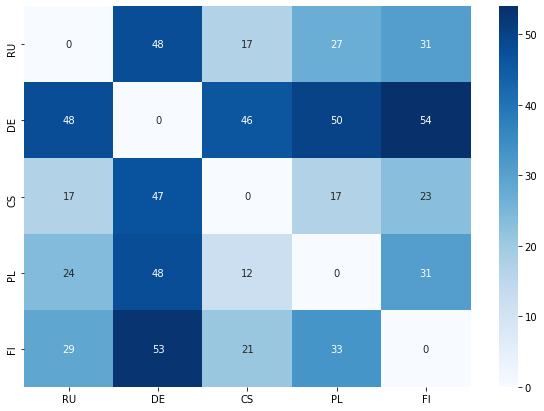

In [567]:
array = nx.adjacency_matrix(G).todense()

df_cm = pd.DataFrame(array, index = list(G.nodes()),
              columns = list(G.nodes()))

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt='g')

In [570]:
solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T)

0.0

## to produce the red graph

In [580]:
G2 = nx.Graph()
G2.add_edge("DE", "RU", weight = solve_tmat2(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]), np.array([ru_dat_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]), np.array([de_dat_avg]))).T))
G2.add_edge("DE", "CS", weight = solve_tmat2(np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]), np.array([cs_dat_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]), np.array([de_dat_avg]))).T))
G2.add_edge("DE", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]), np.array([pl_dat_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]), np.array([de_dat_avg]))).T))
G2.add_edge("DE", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([de_gen_avg]), np.array([de_acc_avg]))).T))

G2.add_edge("RU", "CS", weight = solve_tmat2(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]), np.array([ru_dat_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]), np.array([cs_dat_avg]))).T))
G2.add_edge("RU", "PL", weight = solve_tmat2(np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]), np.array([ru_dat_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]), np.array([pl_dat_avg]))).T))
G2.add_edge("RU", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]))).T))

G2.add_edge("CS", "PL", weight = solve_tmat2(np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]), np.array([pl_dat_avg]), np.array([pl_loc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]), np.array([cs_dat_avg]), np.array([cs_loc_avg]))).T))
G2.add_edge("CS", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([cs_gen_avg]), np.array([cs_acc_avg]))).T))

G2.add_edge("PL", "FI", weight = solve_tmat2(np.concatenate((np.array([fi_gen_avg]), np.array([fi_acc_avg]))).T, \
                                          np.concatenate((np.array([pl_gen_avg]), np.array([pl_acc_avg]))).T))


{('DE', 'RU'): Text(-0.6545085608959198, -0.4755282839152457, '73.55'),
 ('DE', 'CS'): Text(-0.09549137949943542, -0.2938925166937949, '72.94'),
 ('DE', 'PL'): Text(-0.09549149870872498, 0.29389257828263027, '78.68'),
 ('DE', 'FI'): Text(-0.6545087099075317, 0.47552813688782436, '53.46'),
 ('RU', 'CS'): Text(0.2500000596046448, -0.769420713186264, '26.05'),
 ('RU', 'PL'): Text(0.24999994039535522, -0.18163561820983887, '39.46'),
 ('RU', 'FI'): Text(-0.30901727080345154, -5.960464477539063e-08, '29.69'),
 ('CS', 'PL'): Text(0.8090171217918396, 1.4901161193847656e-07, '31.13'),
 ('CS', 'FI'): Text(0.24999991059303284, 0.18163570761680603, '21.96'),
 ('PL', 'FI'): Text(0.2499997913837433, 0.7694208025932312, '32.07')}

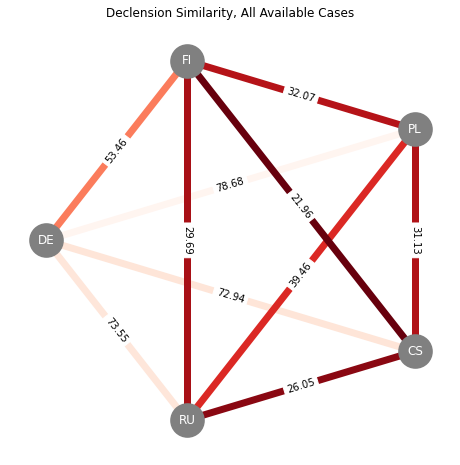

In [581]:
w2 = nx.get_edge_attributes(G2, 'weight')

plt.figure(figsize = (8, 8))
plt.title("Declension Similarity, All Available Cases", size = 12)
pos2 = nx.shell_layout(G2)
nx.draw(G2, pos2, node_size = 1000, node_color = 'gray', font_color = 'white', linewidths = 3,
              edge_color = [-w2[k] for k in w2], width = 7, edge_cmap = plt.cm.Reds,
              labels={node: node for node in G2.nodes()})

#pos = nx.draw(G)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels = nx.get_edge_attributes(G2, 'weight'), font_color='black', )
#nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G)['weight'])

## Idea: what happens if we do a PCA on these "average vectors"?

In [239]:
all_vecs = np.concatenate((np.array([ru_gen_avg]), np.array([ru_acc_avg]), np.array([ru_dat_avg]), \
                          np.array([cs_gen_avg]), np.array([cs_acc_avg]), np.array([cs_dat_avg]), np.array([cs_loc_avg]), \
                         np.array([pl_gen_avg]), np.array([pl_acc_avg]), np.array([pl_dat_avg]), np.array([pl_loc_avg]), \
                        np.array([de_gen_avg]), np.array([de_acc_avg]), np.array([de_dat_avg]), \
                        np.array([fi_acc_avg]), np.array([fi_gen_avg])))

all_vecs.shape




(16, 768)

In [346]:
pca = PCA(n_components = 16)
all_vecs_pca = pca.fit_transform(all_vecs)

In [609]:
sum([4.2804074e-01, 2.1059410e-01, 1.4177115e-01, 9.7628780e-02])

0.87803477

In [347]:
pca.explained_variance_ratio_

array([4.2804074e-01, 2.1059410e-01, 1.4177115e-01, 9.7628780e-02,
       3.6200080e-02, 3.3545975e-02, 1.9170323e-02, 1.1462013e-02,
       6.4475387e-03, 6.2180730e-03, 3.2488138e-03, 2.9018442e-03,
       1.7219512e-03, 1.0255382e-03, 2.3081438e-05, 2.0781140e-14],
      dtype=float32)

In [278]:
labels = ["ru_gen", "ru_acc", "ru_dat", "cs_gen", "cs_acc", "cs_dat", "cs_loc", \
            "pl_gen", "pl_acc", "pl_dat", "pl_loc", "de_gen", "de_acc", "de_dat", \
            "fi_acc","fi_gen"]

c = [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4]

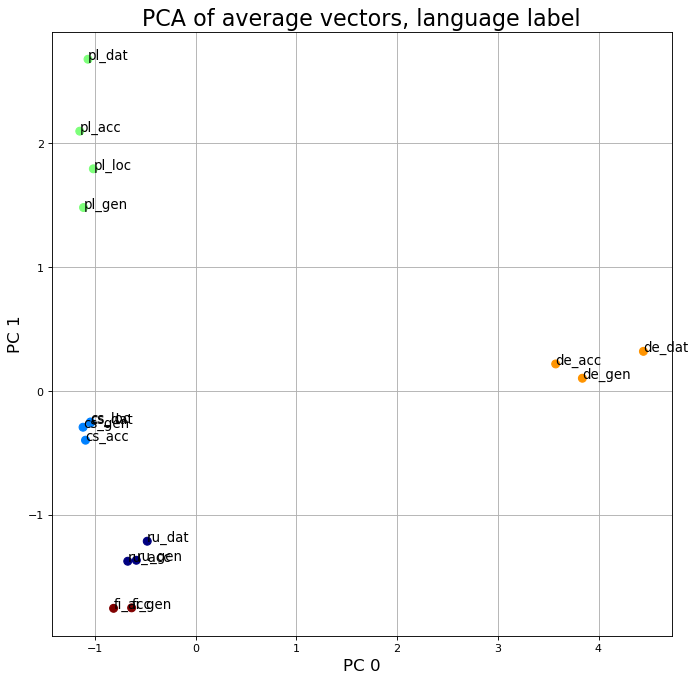

In [554]:
plt.figure(figsize=(10, 10), dpi=80)
plt.grid()
plt.title("PCA of average vectors, language label", size = 20)
plt.xlabel("PC 0", size = 15)
plt.ylabel("PC 1", size = 15)

plt.scatter(all_vecs_pca[:,0], all_vecs_pca[:,1], c = c, cmap = "jet", s = 50)

for i, x in enumerate(labels):
    #print(x)
    plt.annotate(x, (all_vecs_pca[i,0], all_vecs_pca[i,1]), size = 12)

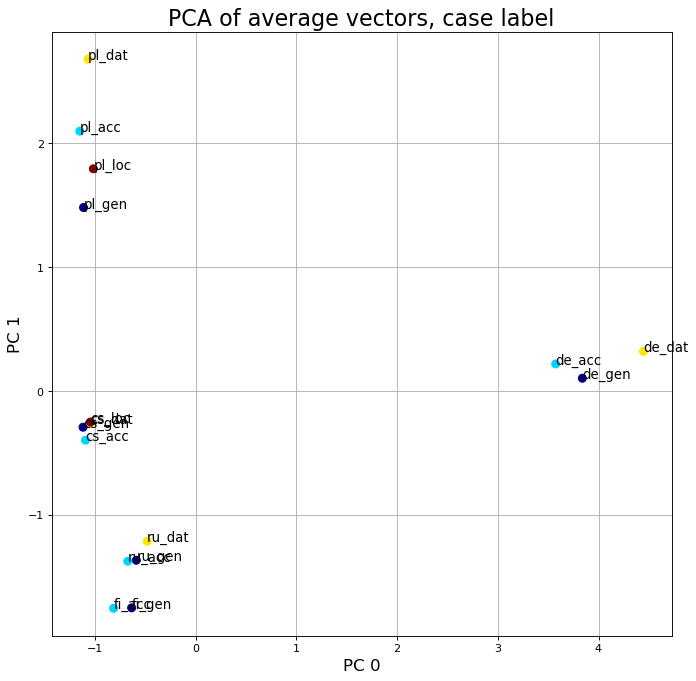

In [553]:
plt.figure(figsize=(10, 10), dpi=80)
plt.grid()
plt.title("PCA of average vectors, case label", size = 20)
plt.xlabel("PC 0", size = 15)
plt.ylabel("PC 1", size = 15)

plt.scatter(all_vecs_pca[:,0], all_vecs_pca[:,1], c = [0,1,2,0,1,2,3,0,1,2,3,0,1,2,1,0], cmap = "jet", s = 50)

for i, x in enumerate(labels):
    #print(x)
    plt.annotate(x, (all_vecs_pca[i,0], all_vecs_pca[i,1]), size = 12)

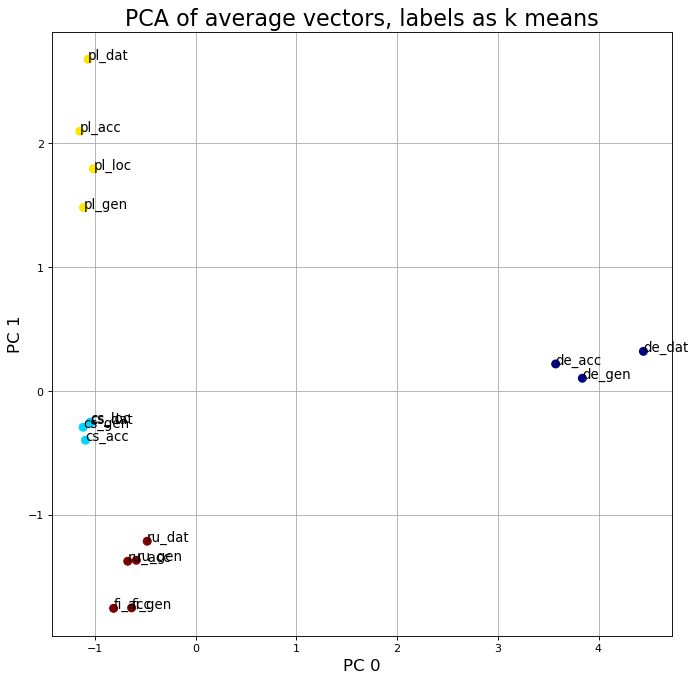

In [552]:
# K Means on the PCA
xi = 0
yi = 1

kmeans = KMeans(n_clusters = 4, random_state = 0).fit(all_vecs_pca[:,[xi,yi]])

plt.figure(figsize=(10, 10), dpi=80)
plt.grid()
plt.title("PCA of average vectors, labels as k means", size = 20)
plt.xlabel("PC " + str(xi), size = 15)
plt.ylabel("PC " + str(yi), size = 15)

plt.scatter(all_vecs_pca[:,xi], all_vecs_pca[:,yi], c = kmeans.labels_
            , cmap = "jet", s = 50)

for i, x in enumerate(labels):
    #print(x)
    plt.annotate(x, (all_vecs_pca[i,xi], all_vecs_pca[i,yi]), size = 12)

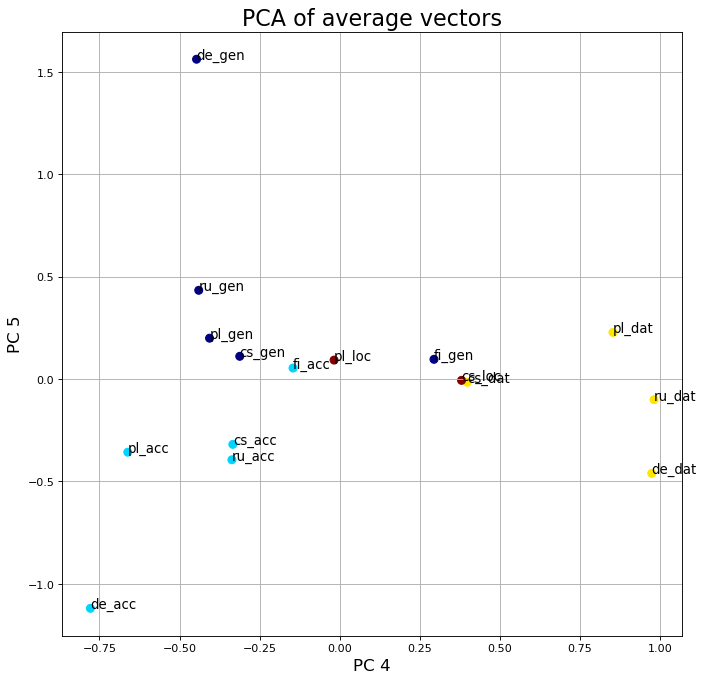

In [303]:
xi = 4 # 4 and 5 seem to be saying something
yi = 5

plt.figure(figsize=(10, 10), dpi=80)
plt.grid()
plt.title("PCA of average vectors", size = 20)
plt.xlabel("PC " + str(xi), size = 15)
plt.ylabel("PC " + str(yi), size = 15)

plt.scatter(all_vecs_pca[:,xi], all_vecs_pca[:,yi], c = [0,1,2,0,1,2,3,0,1,2,3,0,1,2,1,0]
            , cmap = "jet", s = 50)

for i, x in enumerate(labels):
    #print(x)
    plt.annotate(x, (all_vecs_pca[i,xi], all_vecs_pca[i,yi]), size = 12)

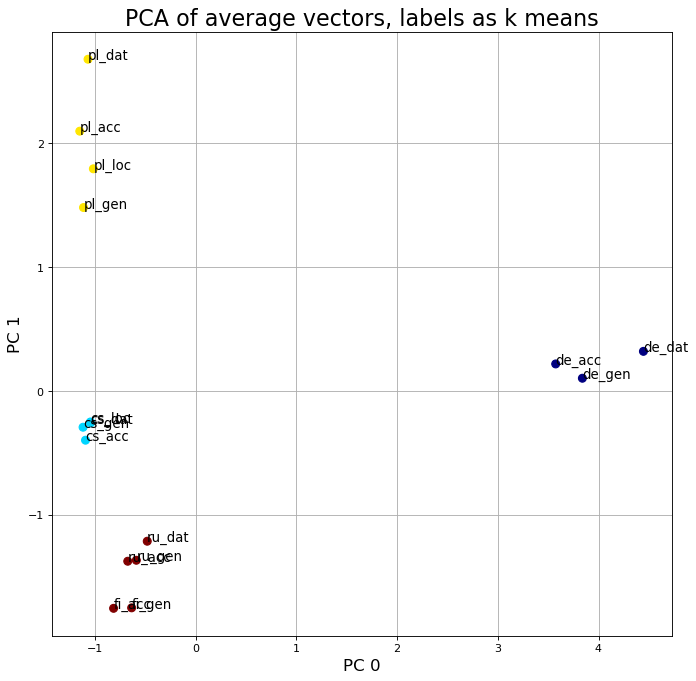

In [326]:
# K Means on the PCA
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(all_vecs_pca[:,[xi,yi]])

plt.figure(figsize=(10, 10), dpi=80)
plt.grid()
plt.title("PCA of average vectors, labels as k means", size = 20)
plt.xlabel("PC " + str(xi), size = 15)
plt.ylabel("PC " + str(yi), size = 15)

plt.scatter(all_vecs_pca[:,xi], all_vecs_pca[:,yi], c = kmeans.labels_
            , cmap = "jet", s = 50)

for i, x in enumerate(labels):
    #print(x)
    plt.annotate(x, (all_vecs_pca[i,xi], all_vecs_pca[i,yi]), size = 12)

In [329]:
def same(l):
    
    lp = []
    
    for x in l:
        if x not in lp:
            lp.append(x)
            
    return len(l) - len(lp) + 1

In [411]:
case_mat = np.zeros((14, 14))
lang_mat = np.zeros((14, 14))

for i in range(13):
    for j in range(i + 1, 14):
    # do k means by principal component
        kmeans_cases = KMeans(n_clusters = 4, random_state = 0).fit(all_vecs_pca[:,[i, j]])
        kmeans_languages = KMeans(n_clusters = 5, random_state = 0).fit(all_vecs_pca[:,[i, j]])

        # for cases, [0,1,2,0,1,2,3,0,1,2,3,0,1,2,1,0]
        # for languages, [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4]

        kcl = kmeans_cases.labels_
        kml = kmeans_languages.labels_
        
        # cases
        kca = same([kcl[0], kcl[3], kcl[7], kcl[11], kcl[15]]) + same([kcl[1], kcl[4], kcl[8], kcl[12], kcl[14]]) + \
                same([kcl[2], kcl[5], kcl[9], kcl[13]]) + same([kcl[6], kcl[10]])
        kca /= 16
        
        kml = same([kml[0], kml[1], kml[2]]) + same([kml[3], kml[4], kml[5], kml[6]]) + \
                same([kml[7], kml[8], kml[9], kml[10]]) + same([kml[11], kml[12], kml[13]]) + same([kml[14], kml[15]])
        kml /= 16
                
        
        # languages
        case_mat[i][j] = kca
        lang_mat[i][j] = kml
        #print(kca, kml)

        #print(i, j, kmeans_cases.labels_, kmeans_languages.labels_)

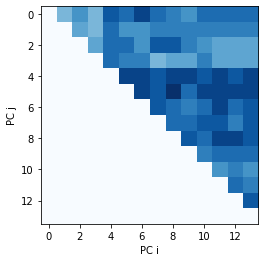

In [412]:
plt.xlabel("PC i")
plt.ylabel("PC j")

plt.imshow(case_mat, cmap = 'Blues')

In [413]:
np.unravel_index(case_mat.argmax(), case_mat.shape)

(5, 8)

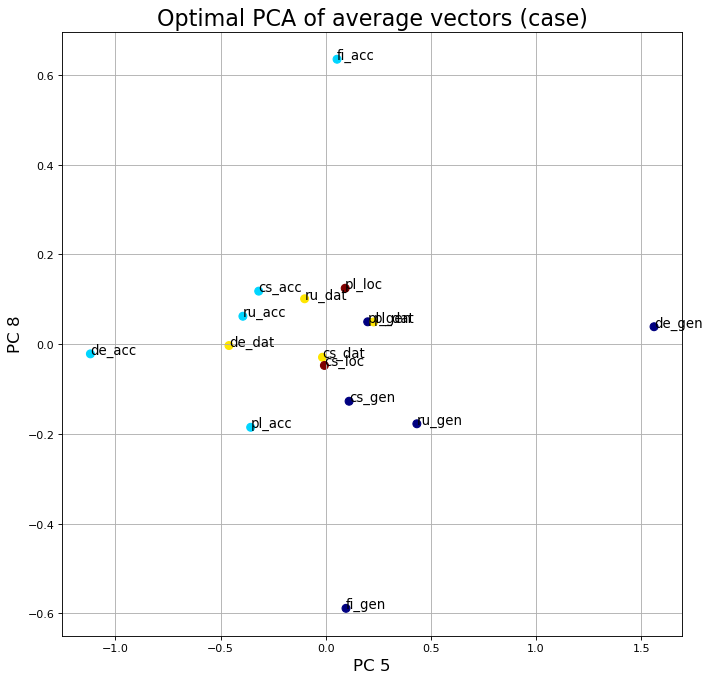

In [555]:
xi = 5 # 4 and 5 seem to be saying something
yi = 8

plt.figure(figsize=(10, 10), dpi=80)
plt.grid()
plt.title("Optimal PCA of average vectors (case)", size = 20)
plt.xlabel("PC " + str(xi), size = 15)
plt.ylabel("PC " + str(yi), size = 15)

plt.scatter(all_vecs_pca[:,xi], all_vecs_pca[:,yi], c = [0,1,2,0,1,2,3,0,1,2,3,0,1,2,1,0]
            , cmap = "jet", s = 50)

for i, x in enumerate(labels):
    #print(x)
    plt.annotate(x, (all_vecs_pca[i,xi], all_vecs_pca[i,yi]), size = 12)

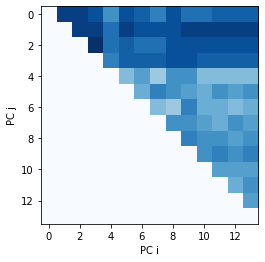

In [415]:
plt.xlabel("PC i")
plt.ylabel("PC j")

plt.imshow(lang_mat, cmap = 'Blues')

In [416]:
np.unravel_index(lang_mat.argmax(), lang_mat.shape)

(2, 3)

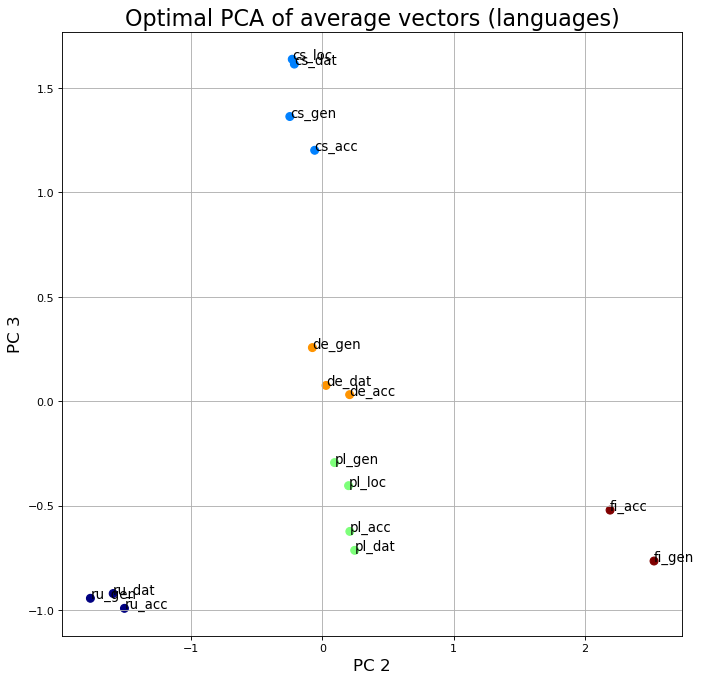

In [556]:
# K Means on the PCA
xi = 2
yi = 3

kmeans = KMeans(n_clusters = 4, random_state = 0).fit(all_vecs_pca[:,[xi,yi]])

plt.figure(figsize=(10, 10), dpi=80)
plt.grid()
plt.title("Optimal PCA of average vectors (languages)", size = 20)
plt.xlabel("PC " + str(xi), size = 15)
plt.ylabel("PC " + str(yi), size = 15)

plt.scatter(all_vecs_pca[:,xi], all_vecs_pca[:,yi], c = c
            , cmap = "jet", s = 50)

for i, x in enumerate(labels):
    #print(x)
    plt.annotate(x, (all_vecs_pca[i,xi], all_vecs_pca[i,yi]), size = 12)

In [418]:
def tern(x):
    
    x = np.where(x > 0, 1, x)
    x = np.where(x < 0, -1, x)
    
    return x

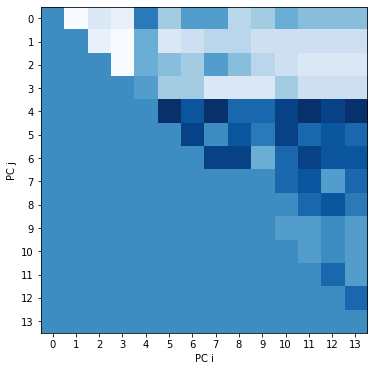

In [420]:
plt.figure(figsize = (6, 6))

plt.xlabel("PC i")
plt.ylabel("PC j")

plt.xticks(np.arange(16))
plt.yticks(np.arange(16))
#plt.grid()

plt.imshow(case_mat - lang_mat, cmap = 'Blues')

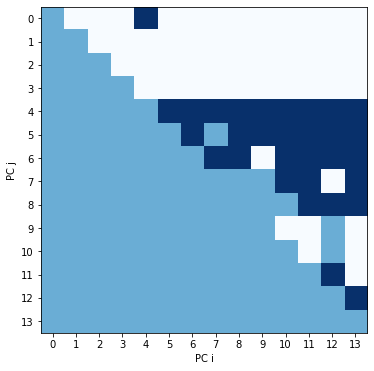

In [422]:
plt.figure(figsize = (6, 6))

plt.xlabel("PC i")
plt.ylabel("PC j")

plt.xticks(np.arange(16))
plt.yticks(np.arange(16))
#plt.grid()

plt.imshow(tern(case_mat - lang_mat), cmap = 'Blues') # dark is case advantage, white is language advantage